# Generating music clusters from Spotify

In [1]:
# data wrangling
import pandas as pd
import numpy as np
import itertools
import random
import re

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from IPython.display import JSON


#API wrapper 
import spotify_keys # To use the code you need to import a .py file with your Spotify credentials (here stored in cid and csecret)
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA



# 1. Importing audio data

Choose from two existing data sets (1,000 or 5,000 tracks) or paste your own playlist (only the first 100 tracks)

In [2]:
def get_music_source():
    while True:
        try:
            source = int(input("Please choose your music source: 1: 1,000 songs, 2: 5,000 songs, 3: own playlist"))

            if source == 1:
                location1 = "https://raw.githubusercontent.com/jarisdata/Data_Science_Bootcamp/main/Project_4/data/df_audio_features_1000.csv"
                songs1000_df = pd.read_csv(location1)#, index_col=['artist','name'])
                songs_full_df = songs1000_df.copy()#reset_index()
                return(songs_full_df)
               
                

            if source == 2:
                location2 = "https://raw.githubusercontent.com/jarisdata/Data_Science_Bootcamp/main/Project_4/data/df_audio_features_5000.csv"
                songs5000_raw_df = pd.read_csv(location2)#, index_col=['artist','name'])
                

                ## get rid of the white spaces within column names
                songs5000_clean_df = songs5000_raw_df.copy()
                songs5000_clean_df.columns = songs5000_raw_df.columns.str.strip()

                ## get rid of non existant data 
                songs_full_df = songs5000_clean_df.dropna()
                #songs_df = songs5000_clean_df.drop(['artist','name','duration_ms','time_signature','id','type','html'], axis=1)
                
                return(songs_full_df)

            if source == 3:
                while True:
                    try:
                        link = str(input("Paste Spotify playlist link (i.e. https://open.spotify.com/playlist/...)"))
                        break
                    except ValueError:
                        print("Invalid input. Please try again.")
               
                cid = spotify_keys.cid
                csecret = spotify_keys.csecret
                sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
                client_id=f"{cid}",
                client_secret=f"{csecret}"))
                playlist_link = f"{link}"
                playlist_URI = playlist_link.split("/")[-1].split("?")[0]
                track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]
                track_dict = {
                                    'name':[],
                                    'artist':[],
                                    'danceability':[],
                                    'energy':[],
                                    'key':[],
                                    'loudness':[],
                                    'mode':[],
                                    'speechiness':[],
                                    'acousticness':[],
                                    'instrumentalness':[],
                                    'liveness':[],
                                    'valence':[],
                                    'tempo':[],
                                    'type':[],
                                    'duration_ms':[],
                                    'time_signature':[],
                                    'id':[],
                                    'html':[]

                                } 


                spotify_tracks = sp.playlist_tracks(playlist_URI)["items"]
                        #features = sp.audio_features(track_uri)

                for i,track in enumerate(spotify_tracks):
                    track_uri = track["track"]["uri"]
                    features = sp.audio_features(track_uri)
                    try:
                        track_dict['name'].append(track["track"]["name"])
                    except:
                        track_dict['name'].append("NaN")
                    try:
                        track_dict['artist'].append(track["track"]["artists"][0]["name"])
                    except:
                        track_dict['artist'].append("NaN")
                    try:
                        track_dict['danceability'].append(features[0]['danceability'])
                    except:
                        track_dict['danceability'].append("NaN")
                    try:
                        track_dict['energy'].append(features[0]['energy'])
                    except:
                        track_dict['energy'].append("NaN")
                    try:
                        track_dict['key'].append(features[0]['key'])
                    except:
                        track_dict['key'].append("NaN")
                    try:
                        track_dict['loudness'].append(features[0]['loudness'])
                    except:
                        track_dict['loudness'].append("NaN")
                    try:
                        track_dict['mode'].append(features[0]['mode'])
                    except:
                        track_dict['mode'].append("NaN")
                    try:
                        track_dict['speechiness'].append(features[0]['speechiness'])
                    except:
                        track_dict['speechiness'].append("NaN")
                    try:
                        track_dict['acousticness'].append(features[0]['acousticness'])
                    except:
                        track_dict['acousticness'].append("NaN")
                    try:
                        track_dict['instrumentalness'].append(features[0]['instrumentalness'])
                    except:
                        track_dict['instrumentalness'].append("NaN")
                    try:
                        track_dict['liveness'].append(features[0]['liveness'])
                    except:
                        track_dict['liveness'].append("NaN")
                    try:
                        track_dict['valence'].append(features[0]['valence'])
                    except:
                        track_dict['valence'].append("NaN")
                    try:
                        track_dict['tempo'].append(features[0]['tempo'])
                    except:
                        track_dict['tempo'].append("NaN")

                    try:
                        track_dict['type'].append(features[0]['type'])
                    except:
                        track_dict['type'].append("NaN")
                    try:
                        track_dict['duration_ms'].append(features[0]['duration_ms'])
                    except:
                        track_dict['duration_ms'].append("NaN")
                    try:
                        track_dict['time_signature'].append(features[0]['time_signature'])
                    except:
                        track_dict['time_signature'].append("NaN")
                    try:
                        track_dict['id'].append(features[0]['id'])
                    except:
                        track_dict['id'].append("NaN")

                    try:
                        track_dict['html'].append(features[0]['track_href'])
                    except:
                        track_dict['html'].append("NaN")

                spotify_playlist_df = pd.DataFrame(track_dict)

            ## get rid of non existant data 
                spotify_playlist_df.dropna(inplace=True)
                spotify_playlist_df.drop_duplicates(inplace=True)
                #songs_spotify_col = spotify_playlist_df.drop(['artist','name','duration_ms','time_signature','id','type','html'], axis=1)

            # Returning data frame for analysis
                songs_full_df = spotify_playlist_df.copy()
                return(songs_full_df)    
            else:
                break

        except ValueError:
            print("Invalid input. Please try again.")


    

In [3]:
# Example playlist: https://open.spotify.com/playlist/4Q0UT3K9L90mVI6rHdUxEE?si=662daba40c524808
songs_full_df = pd.DataFrame(get_music_source())
songs_df = songs_full_df.drop(['artist','name','duration_ms','time_signature','id','type','html'], axis=1)
number_songs = len(songs_df)
#songs_full_df
#songs_df

Please choose your music source: 1: 1,000 songs, 2: 5,000 songs, 3: own playlist 2


## 1.1 Inspecting the data

In [4]:
#songs_df.describe()
#songs_df.columns
#songs_df.head(1)
#songs_df.shape()
songs_df.info()
#songs_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   key               5235 non-null   int64  
 3   loudness          5235 non-null   float64
 4   mode              5235 non-null   int64  
 5   speechiness       5235 non-null   float64
 6   acousticness      5235 non-null   float64
 7   instrumentalness  5235 non-null   float64
 8   liveness          5235 non-null   float64
 9   valence           5235 non-null   float64
 10  tempo             5235 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 450.0 KB


# 2. Pre-processing

At the pre-processing stage the data is scaled and relevant audio features and number of clusters are selected

## 2.1 Scaling the data

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

preprocessing.MinMaxScaler([feature_range, ...]) Transform features by scaling each feature to a given range.

preprocessing.StandardScaler(*[, copy, ...]) Standardize features by removing the mean and scaling to unit variance.

preprocessing.PowerTransformer([method, ...]) Apply a power transform featurewise to make data more Gaussian-like.

preprocessing.QuantileTransformer(*[, ...]) Transform features using quantiles information.

preprocessing.RobustScaler(*[, ...]) Scale features using statistics that are robust to outliers.

In [5]:
while True:
    try:
        s = int(input("Please choose the scaling method: 0: minmax, 1: standard, 2: power, 3: quantile, 4: robust"))
        break
    except ValueError:
        print("Invalid input. Please try again.")

scaler_dict = {'minmax':
MinMaxScaler(), 'standard': StandardScaler(), 'power': PowerTransformer(), 'quantile': QuantileTransformer(), 'robust': RobustScaler()
                            }

# To be called in f-string for column naming
scale_name = list(scaler_dict.keys())[s]

# Set value in [] to 0 for MinMax and 1 for Standard
scaler = list(scaler_dict.values())[s]
my_scaler = scaler.set_output(transform='pandas')
name_scaler = str(scaler)[0:-2]
# Scaled dataframe to work with
songs_scaled_df = my_scaler.fit_transform(songs_df)
songs_scaled_df

Please choose the scaling method: 0: minmax, 1: standard, 2: power, 3: quantile, 4: robust 0


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
1,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
2,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
3,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
4,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
5231,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
5232,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469
5233,0.137539,0.02080,0.363636,0.498142,1.0,0.045643,0.886546,0.512690,0.112462,0.060000,0.313608


## 2.2 Identifying relevant audio features 

Pairwise correlations help identify uncorrelated (if possible orthogonal) vectors.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html


Additionally a PCA could run to summarize the features into composite indexes.
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [6]:
songs_scaled_df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.040491,0.002152,0.358328,-0.088908,0.036121,-0.111151,-0.573800,-0.032534,0.680097,-0.009585
energy,0.040491,1.000000,0.029702,0.786860,-0.008461,0.303940,-0.850469,-0.169923,0.170642,0.159101,0.211617
key,0.002152,0.029702,1.000000,0.027082,-0.155697,0.027547,-0.024794,-0.016775,0.025193,-0.018109,-0.002370
loudness,0.358328,0.786860,0.027082,1.000000,-0.030855,0.233609,-0.697709,-0.471786,0.134788,0.335754,0.213228
mode,-0.088908,-0.008461,-0.155697,-0.030855,1.000000,-0.041282,0.028854,-0.003017,-0.009712,0.005966,0.004739
speechiness,0.036121,0.303940,0.027547,0.233609,-0.041282,1.000000,-0.265754,-0.064754,0.081963,-0.011395,0.064255
acousticness,-0.111151,-0.850469,-0.024794,-0.697709,0.028854,-0.265754,1.000000,0.194941,-0.103144,-0.130646,-0.187994
instrumentalness,-0.573800,-0.169923,-0.016775,-0.471786,-0.003017,-0.064754,0.194941,1.000000,-0.051664,-0.500584,-0.071945
liveness,-0.032534,0.170642,0.025193,0.134788,-0.009712,0.081963,-0.103144,-0.051664,1.000000,0.007272,0.036370
valence,0.680097,0.159101,-0.018109,0.335754,0.005966,-0.011395,-0.130646,-0.500584,0.007272,1.000000,0.098783


For 5,000 songs data set:
Danceability, energy, and tempo are not correlated with each other. 
Danceability is correlated with valence and instrumentalness. 
Energy is correlated with loudness and acousticness.
Tempo is largely uncorrelated
Key, mode, liveliness, and speechiness are largely irrelevant 

In [7]:
# Choose from column list which audio featuers to include

column_list = [
    'danceability',
    'energy',
    #'key',
    #'loudness', 	
    #'mode',
    #'speechiness',
    #'acousticness',
    #'instrumentalness',
    #'liveness',
    #'valence',
    'tempo'
    ] 

# Audio features used in graphs
feature_1 = column_list[0]
feature_2 = column_list[1]
feature_3 = column_list[2]

# Used in column labeling below
num_col = len(column_list)
name_col = [item[0] for item in column_list]
col_name = ''.join(name_col)

# Dataframe with selected columns only
songs_col_df = songs_scaled_df[column_list]
songs_col_df

,danceability,energy,tempo
0,0.680455,0.25900,0.515800
1,0.767322,0.39900,0.584322
2,0.880041,0.73000,0.437862
3,0.729059,0.05020,0.499098
4,0.673216,0.11900,0.565171
...,...,...,...
5230,0.208893,0.06940,0.410795
5231,0.194416,0.10100,0.388495
5232,0.061634,0.00093,0.334469
5233,0.137539,0.02080,0.313608


## 2.3 Identifying the relevant number of clusters 

### Inertia

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [8]:
max_clusters = 12

inertia_list = []

for i in range(2,max_clusters+1):
    model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
    model_loop.fit(songs_col_df)
    inertia_list.append(round(model_loop.inertia_,3))
inertia_list

[456.493,
 272.009,
 219.205,
 191.26,
 173.719,
 156.738,
 141.034,
 128.159,
 118.201,
 111.116,
 105.465]

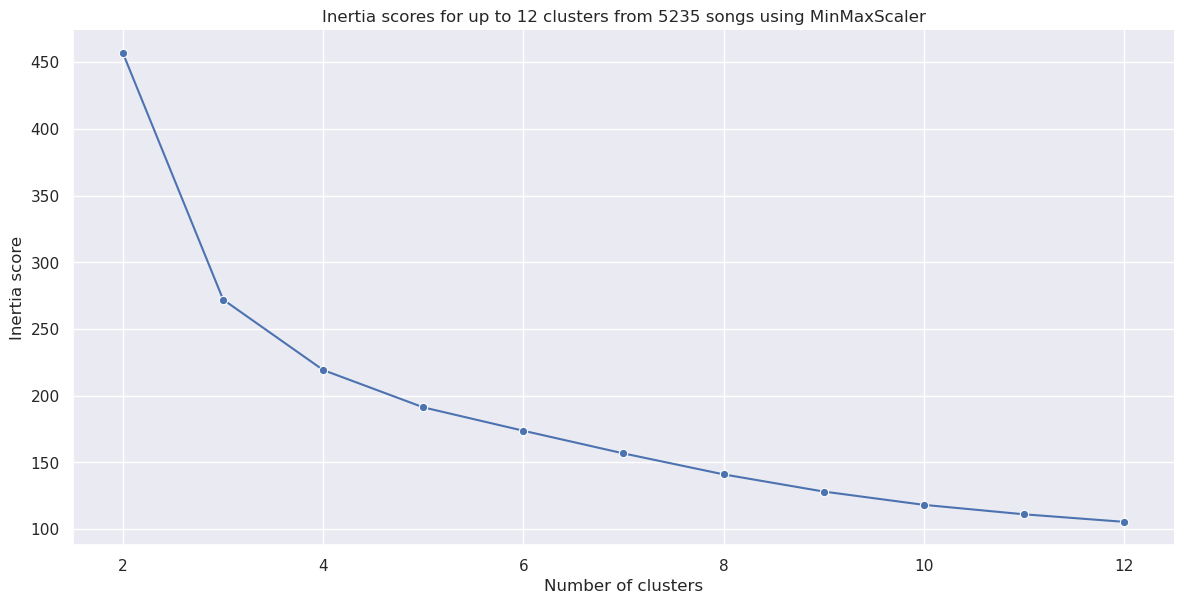

In [9]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(2,max_clusters+1),y=inertia_list,marker='o',height=6,aspect=2)
    .set(title=f"Inertia scores for up to {max_clusters} clusters from {number_songs} songs using {name_scaler}")
    .set_axis_labels("Number of clusters", "Inertia score")
);

### Silhouette scores

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 

In [10]:
silhouette_list = []

for i in range(2,max_clusters+1):
    model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
    model_loop.fit(songs_col_df)
    score = silhouette_score(songs_col_df,model_loop.labels_)
    silhouette_list.append(round(score,2))
print(silhouette_list)

[0.43, 0.42, 0.37, 0.32, 0.3, 0.3, 0.3, 0.29, 0.3, 0.3, 0.29]


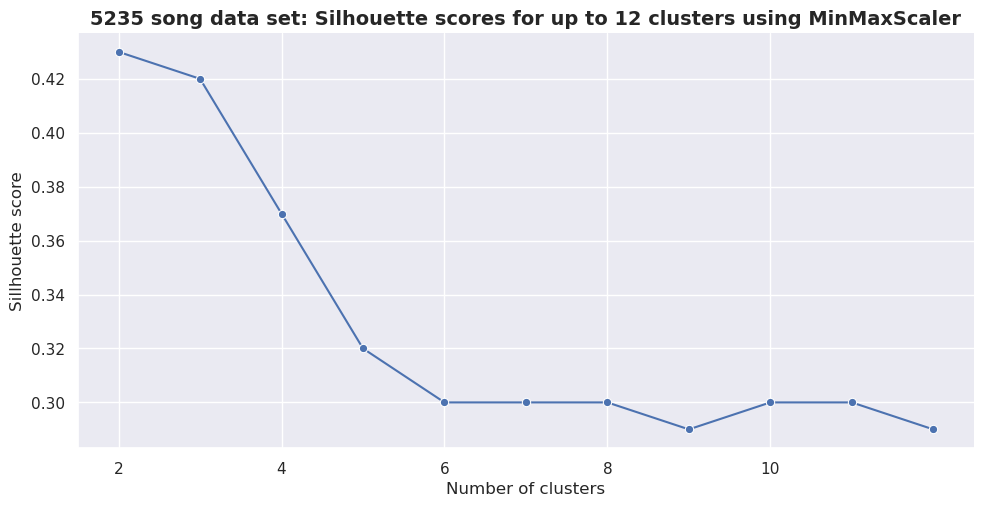

In [11]:
(sns.relplot(kind='line',x=range(2,max_clusters+1),y=silhouette_list,marker='o',height=5,aspect=2)
    .set(title=f"Silhouette scores for up to {max_clusters} clusters from {number_songs} songs ")
    .set_axis_labels("Number of clusters", "Sillhouette score")
);
plt.xticks(range(2,max_clusters,2))
plt.title(f"{number_songs} song data set: Silhouette scores for up to {max_clusters} clusters using {name_scaler}",fontweight="bold", fontsize=14)
plt.show()

* For k = 3 the average to silhouette is: 0.4247
	- For cluster = 0 the silhouette value is: 0.43
	- For cluster = 1 the silhouette value is: 0.39
	- For cluster = 2 the silhouette value is: 0.48
* For k = 4 the average to silhouette is: 0.3663
	- For cluster = 0 the silhouette value is: 0.24
	- For cluster = 1 the silhouette value is: 0.47
	- For cluster = 2 the silhouette value is: 0.4
	- For cluster = 3 the silhouette value is: 0.35
* For k = 5 the average to silhouette is: 0.3211
	- For cluster = 0 the silhouette value is: 0.32
	- For cluster = 1 the silhouette value is: 0.38
	- For cluster = 2 the silhouette value is: 0.44
	- For cluster = 3 the silhouette value is: 0.24
	- For cluster = 4 the silhouette value is: 0.21
* For k = 6 the average to silhouette is: 0.2979
	- For cluster = 0 the silhouette value is: 0.27
	- For cluster = 1 the silhouette value is: 0.21
	- For cluster = 2 the silhouette value is: 0.37
	- For cluster = 3 the silhouette value is: 0.3
	- For cluster = 4 the

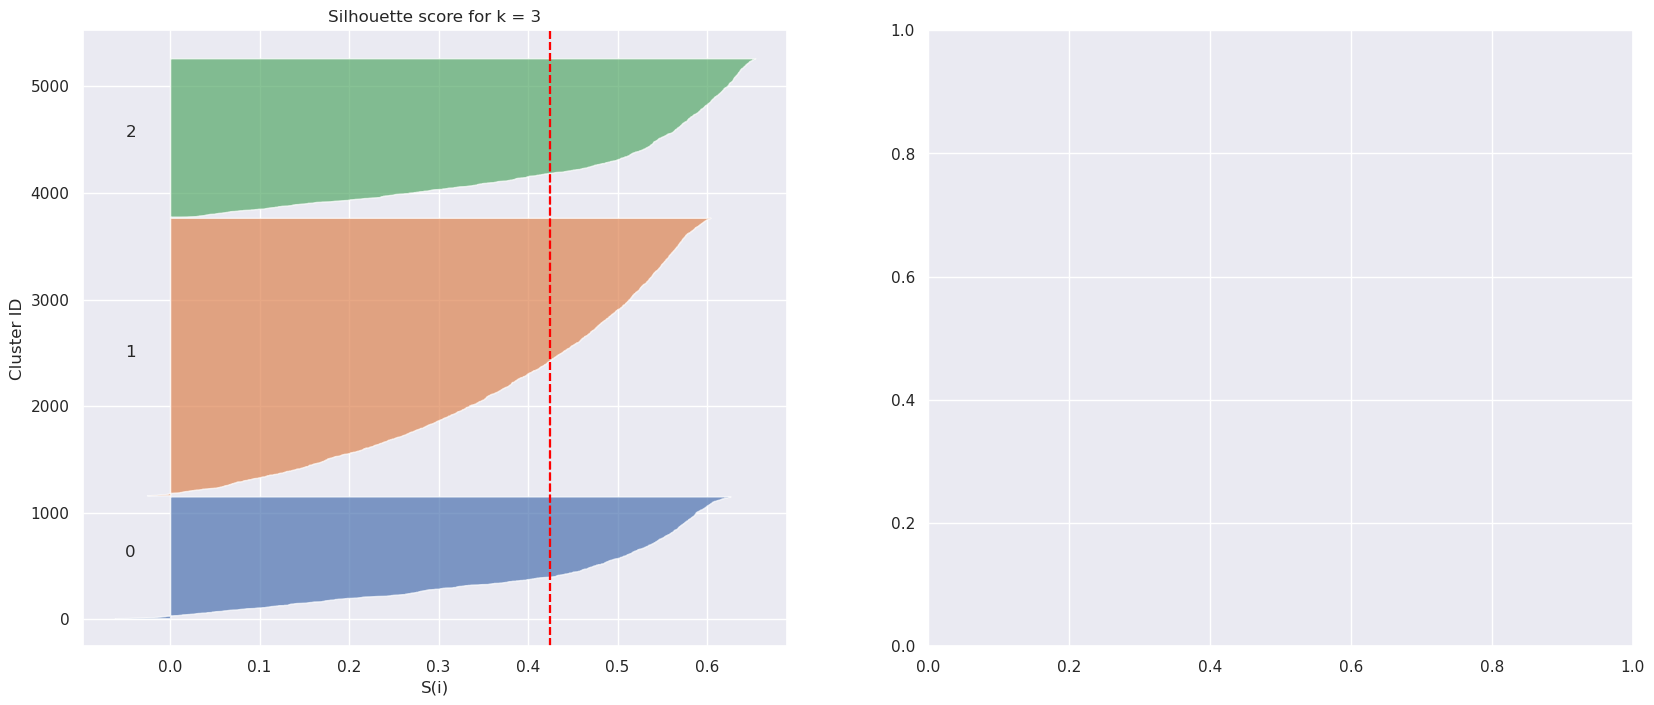

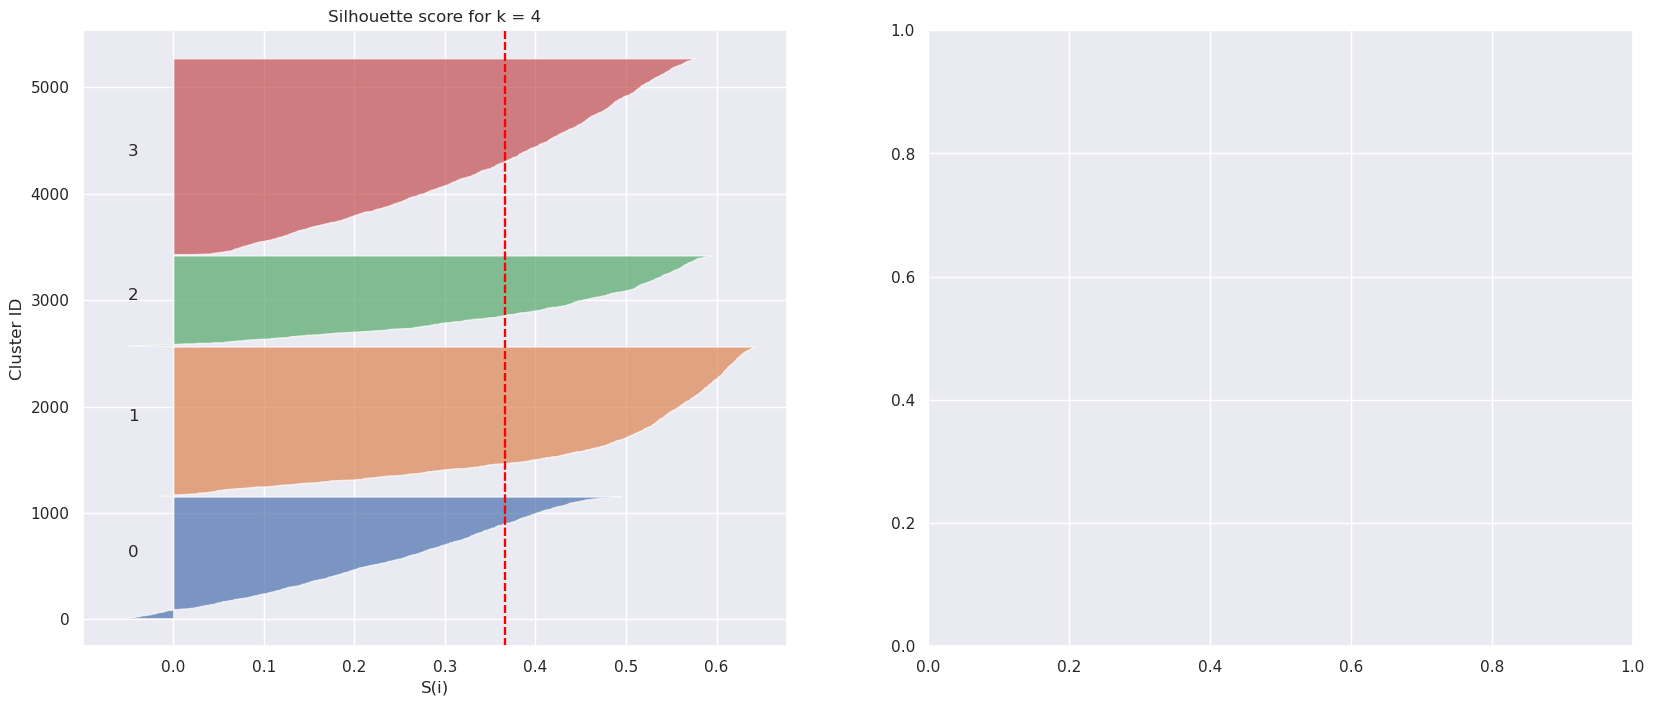

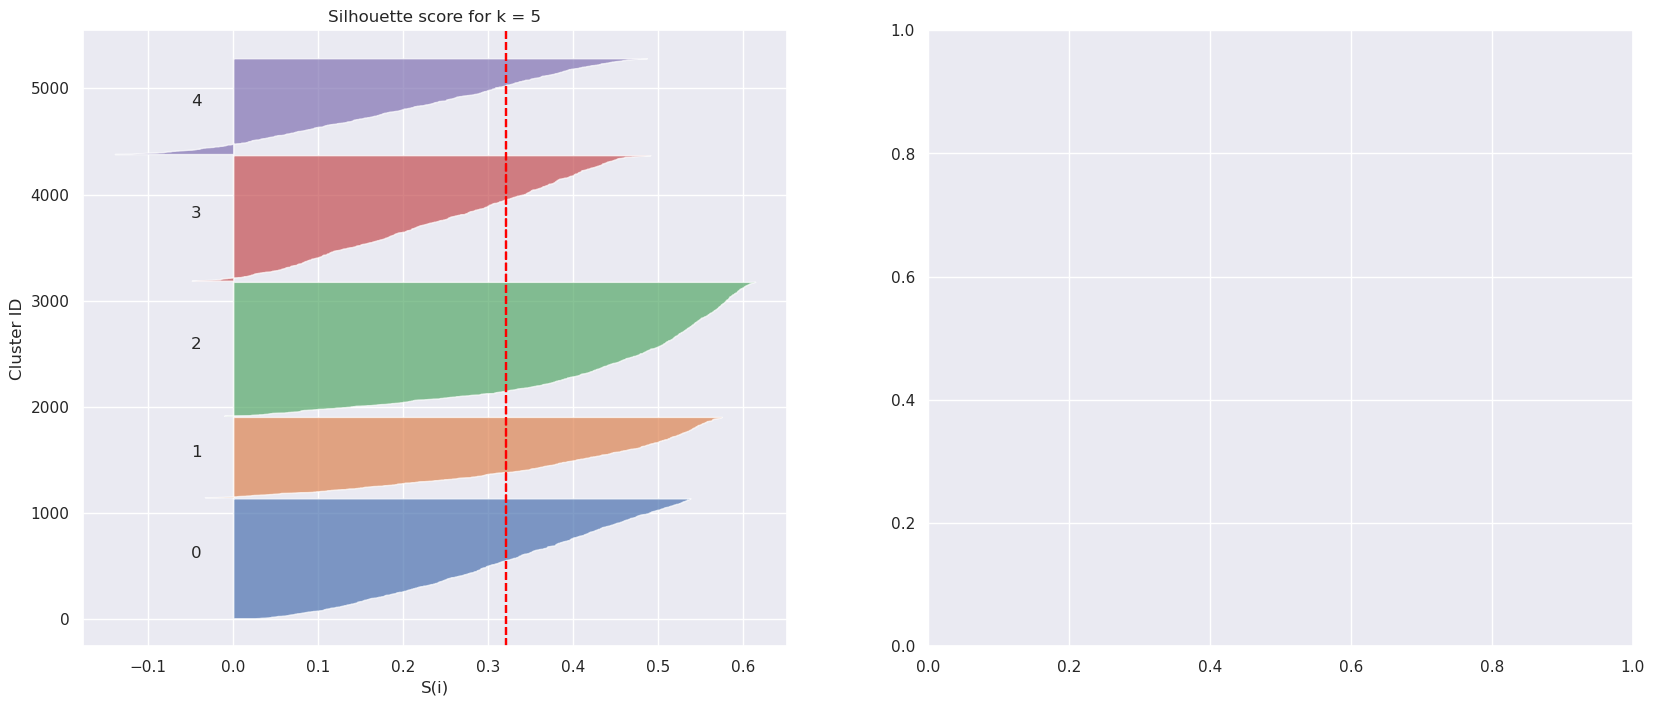

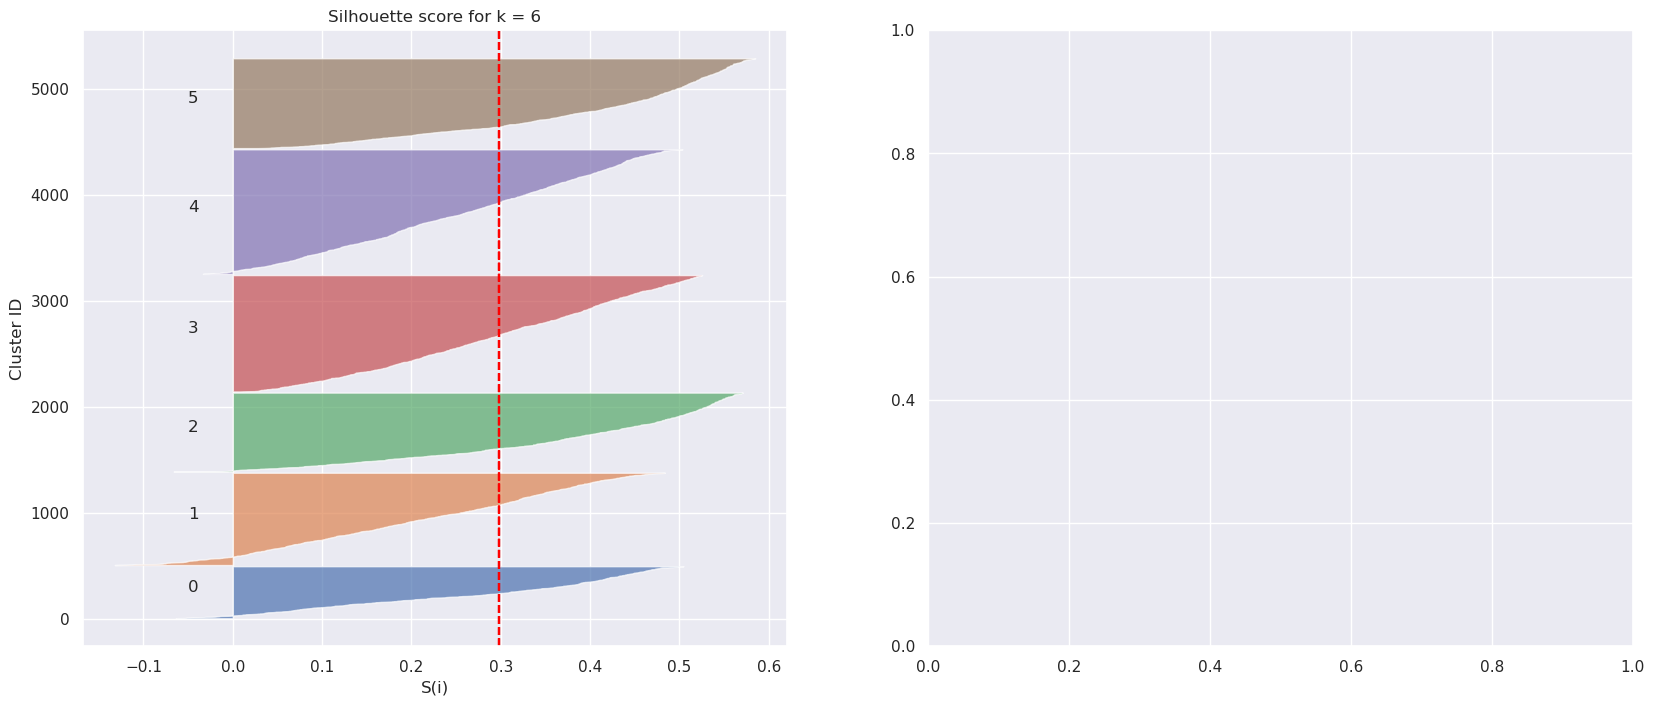

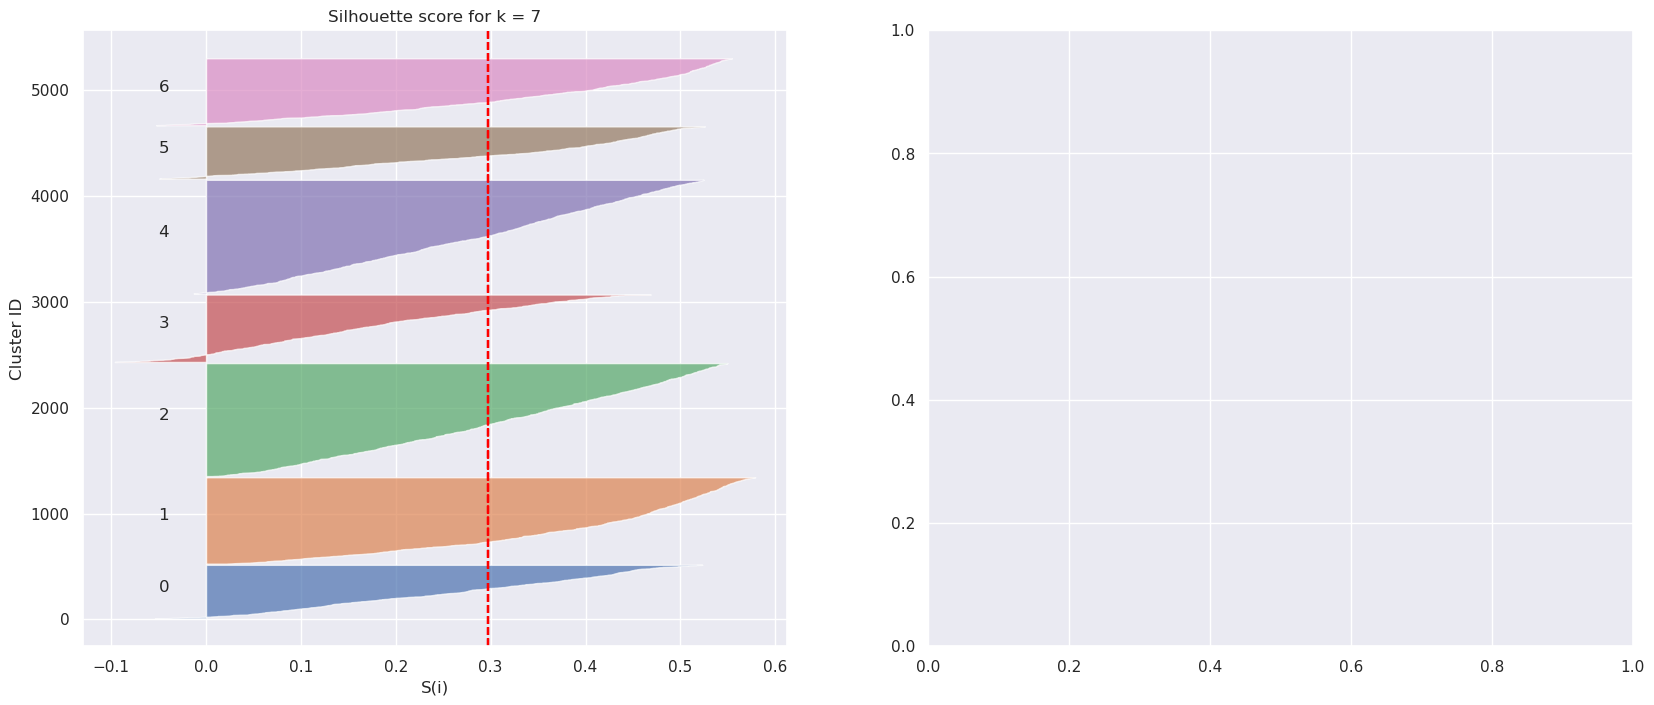

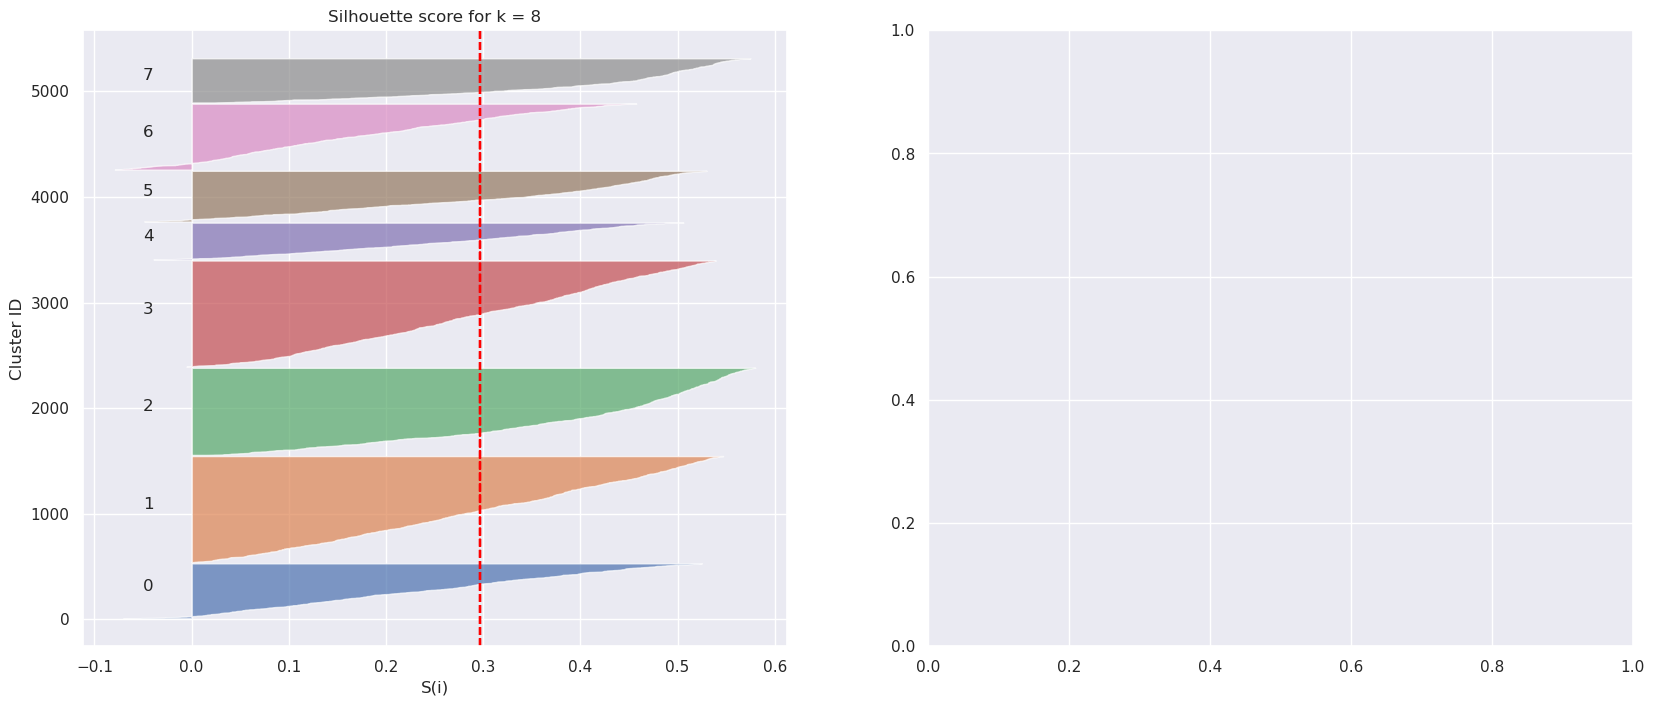

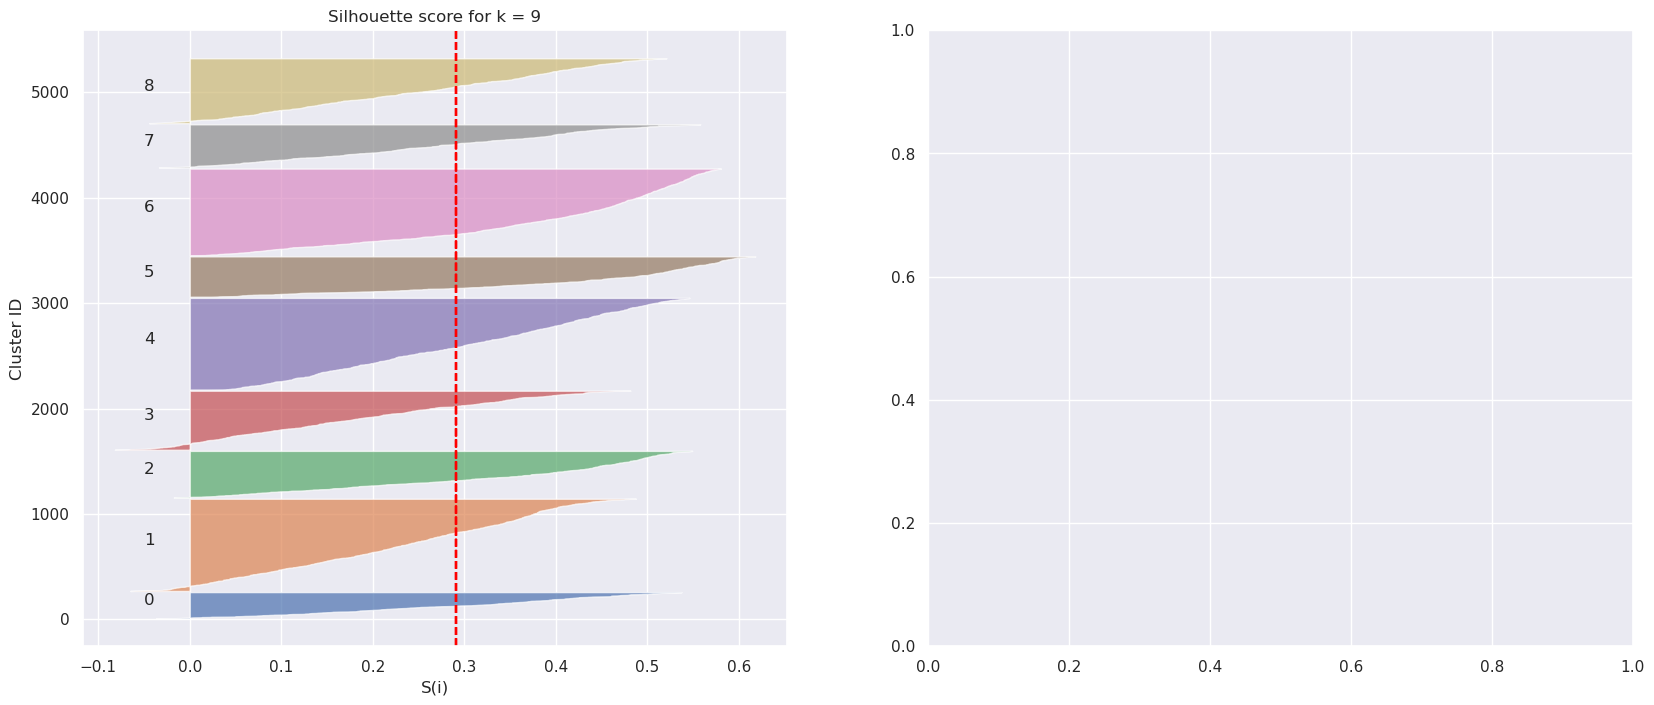

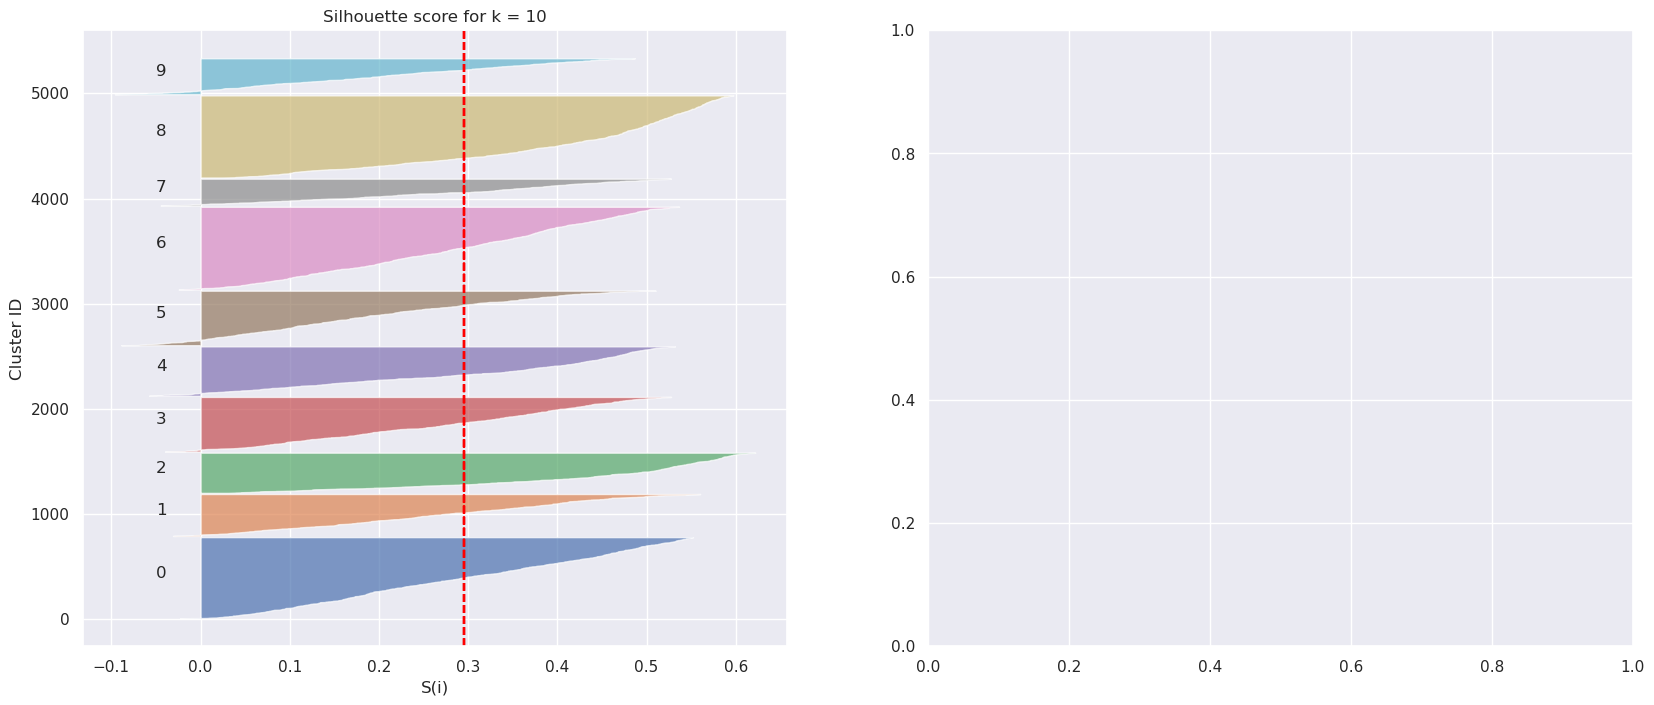

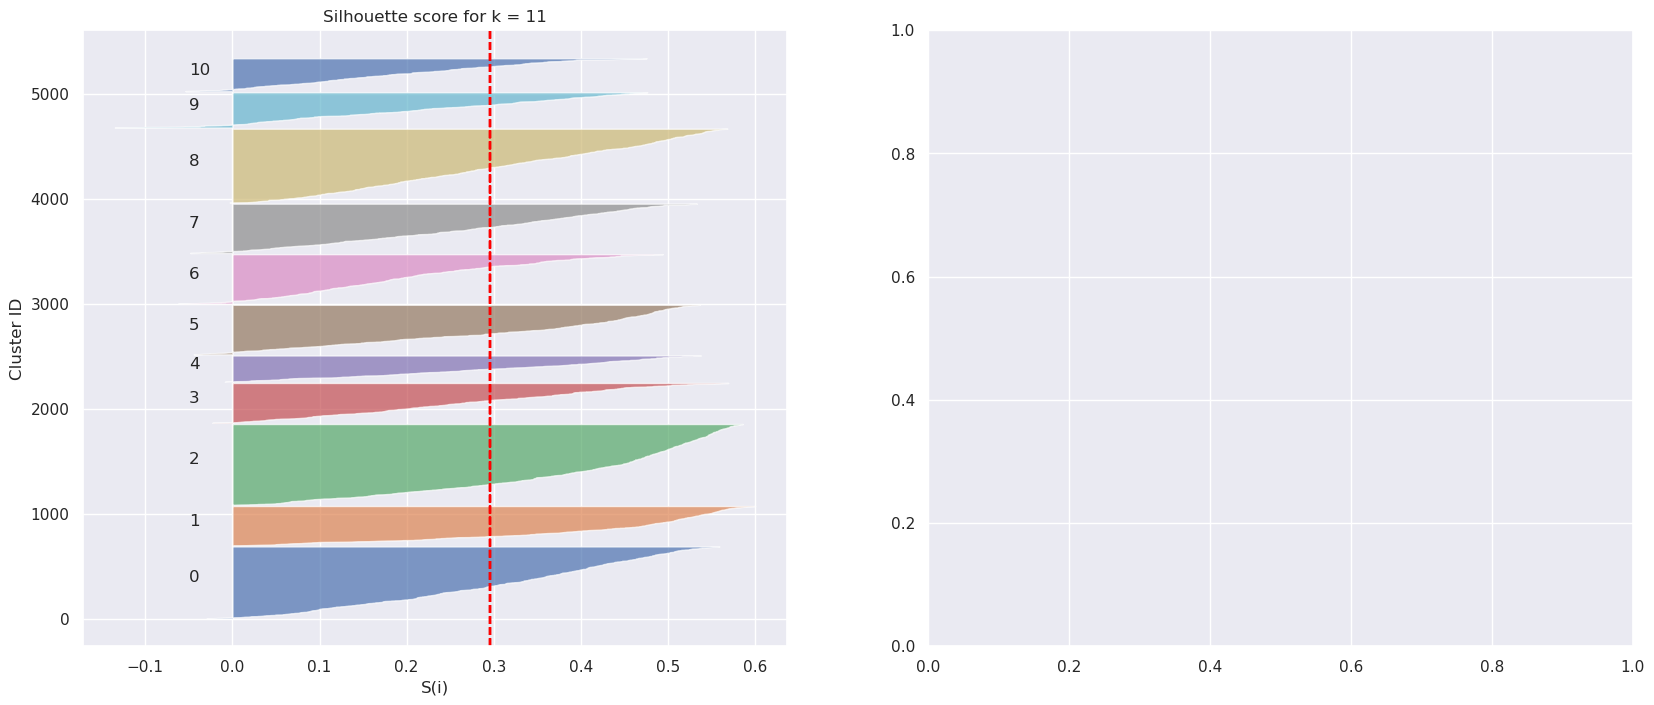

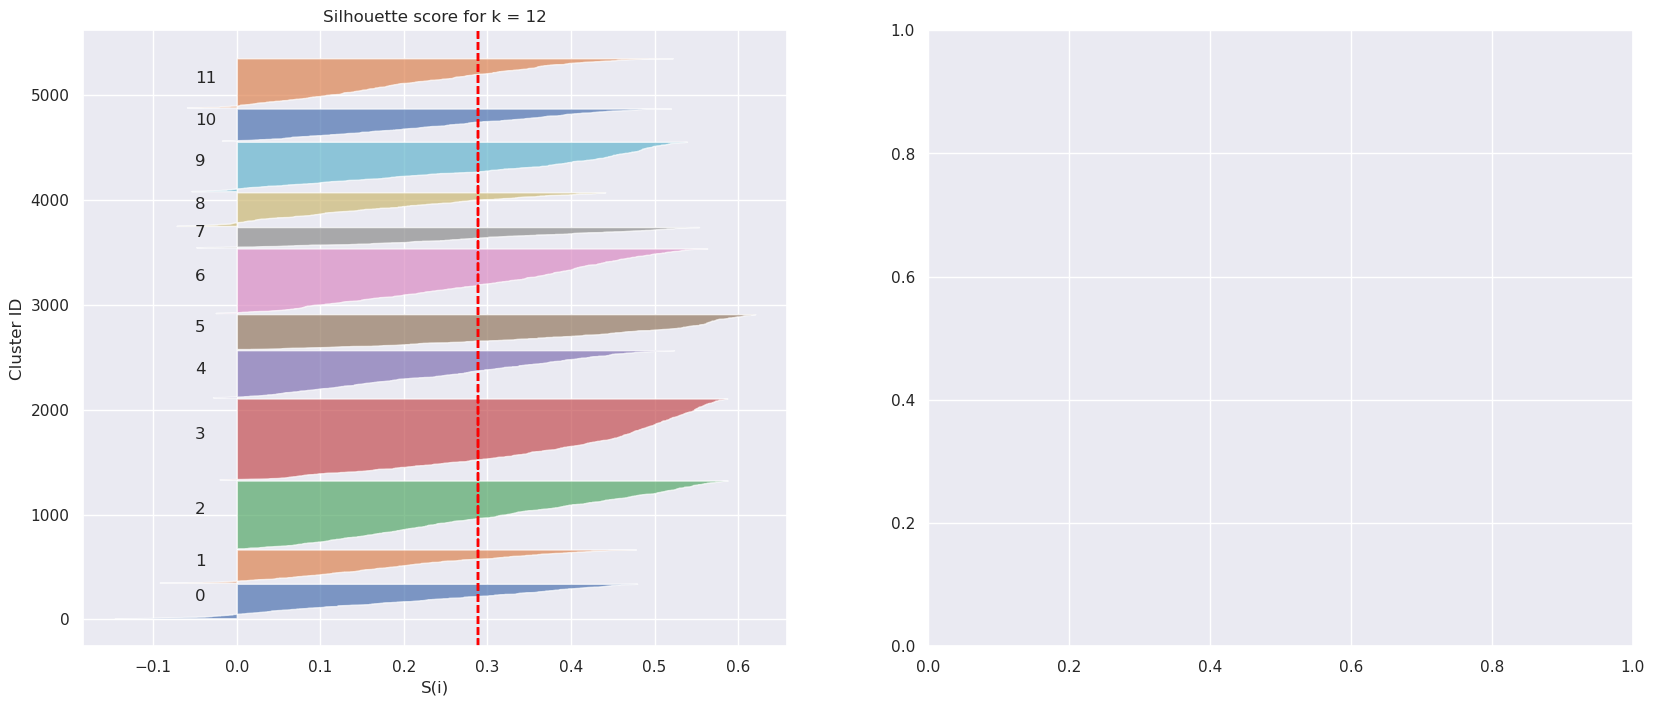

In [12]:
# Knife plot of clusters


data = songs_col_df

for k in range(3, max_clusters+1): 
    kmean_model = KMeans(n_clusters=k,n_init=10,random_state=123).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            silhouette_avg = silhouette_score(songs_col_df, labels)
            axis1.axvline(x=silhouette_avg, color="red", linestyle="--")
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")
plt.show()

# 3. KMeans cluster model 

## 3.1 Seting cluster number

In [13]:

while True:
    try:
        cluster_no = int(input("Enter the number of clusters: "))
        break
    except ValueError:
        print("Invalid input. Please try again.")


cluster_model = KMeans(n_clusters=cluster_no, n_init=10)
cluster_model.fit(songs_col_df)
cluster_model.cluster_centers_

Enter the number of clusters:  6


array([[0.27711232, 0.89144196, 0.73594087],
       [0.79304585, 0.69910373, 0.50024351],
       [0.31792513, 0.12624073, 0.48896528],
       [0.63023904, 0.83057578, 0.62351401],
       [0.60842319, 0.41907146, 0.55189608],
       [0.28329406, 0.91232902, 0.48589837]])

In [14]:
# Labeling the clusters
cluster_model.labels_
songs_plot_df = songs_col_df.copy()
songs_plot_df['cluster'] = cluster_model.labels_
songs_plot_df.head(5)

,danceability,energy,tempo,cluster
0,0.680455,0.2590,0.515800,4
1,0.767322,0.3990,0.584322,4
2,0.880041,0.7300,0.437862,1
3,0.729059,0.0502,0.499098,4
4,0.673216,0.1190,0.565171,4


## 3.1 Calculating centroids


In [15]:
#Calculating the centroid position
cl_pos = pd.DataFrame(cluster_model.cluster_centers_)
cl_pos.columns = songs_col_df.columns

# Renaming the columns for merging with songs_plot_df below
cl_pos[f'cl_{feature_1}']= cl_pos[f'{feature_1}']
cl_pos[f'cl_{feature_2}']= cl_pos[f'{feature_2}']
cl_pos[f'cl_{feature_3}']= cl_pos[f'{feature_1}']
cl_pos = cl_pos.drop([f'{feature_1}',f'{feature_2}',f'{feature_3}'],axis=1)

In [16]:
# Merging the data frames with song audio features and cluster centroid positions to calculate the distances
songs_distance_df = pd.merge(songs_plot_df,cl_pos, how='left', left_on='cluster', right_index=True)

# Calculating Euclydian distances to identify songs closest to the cluster centroids
distances_dict = {}
clusters_df = songs_distance_df.copy()
clusters_df["eucl_dist"] = ""
distances = []

for i in range(len(clusters_df)):
    distance = ((clusters_df.iloc[i,0]-clusters_df.iloc[i,4])**2+(clusters_df.iloc[i,1]-clusters_df.iloc[i,5])**2+(clusters_df.iloc[i,2]-clusters_df.iloc[i,6])**2)**0.5
    clusters_df.at[i,'eucl_dist'] = distance

clusters_df['eucl_dist'] = clusters_df['eucl_dist'].apply(pd.to_numeric)
clusters_df

,danceability,energy,tempo,cluster,cl_danceability,cl_energy,cl_tempo,eucl_dist
0,0.680455,0.25900,0.515800,4,0.608423,0.419071,0.608423,0.198471
1,0.767322,0.39900,0.584322,4,0.608423,0.419071,0.608423,0.161964
2,0.880041,0.73000,0.437862,1,0.793046,0.699104,0.793046,0.366986
3,0.729059,0.05020,0.499098,4,0.608423,0.419071,0.608423,0.403201
4,0.673216,0.11900,0.565171,4,0.608423,0.419071,0.608423,0.310019
...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,0.410795,2,0.317925,0.126241,0.317925,0.154089
5231,0.194416,0.10100,0.388495,2,0.317925,0.126241,0.317925,0.144471
5232,0.061634,0.00093,0.334469,2,0.317925,0.126241,0.317925,0.285765
5233,0.137539,0.02080,0.313608,2,0.317925,0.126241,0.317925,0.208987


In [17]:
# Select the share of tracks closest to the centroid

cluster_size = int((round(len(songs_df)*(0.5*(1/cluster_no))),0)[0])
appended_cluster = []
for i in range(cluster_no+1):
    cluster = clusters_df.loc[clusters_df['cluster']==i].nsmallest(int(cluster_size),'eucl_dist')
    appended_cluster.append(cluster)  
appended_cluster = pd.concat(appended_cluster)
appended_cluster

,danceability,energy,tempo,cluster,cl_danceability,cl_energy,cl_tempo,eucl_dist
4335,0.295760,0.830,0.607402,0,0.277112,0.891442,0.277112,0.336473
3427,0.251293,0.926,0.613674,0,0.277112,0.891442,0.277112,0.339315
512,0.321613,0.867,0.613253,0,0.277112,0.891442,0.277112,0.339953
4007,0.288521,0.936,0.616781,0,0.277112,0.891442,0.277112,0.342769
4326,0.322647,0.851,0.616959,0,0.277112,0.891442,0.277112,0.345260
...,...,...,...,...,...,...,...,...
4241,0.280248,0.960,0.518393,5,0.283294,0.912329,0.283294,0.239903
3982,0.300931,0.994,0.508304,5,0.283294,0.912329,0.283294,0.240022
3435,0.112720,0.985,0.436226,5,0.283294,0.912329,0.283294,0.240343
3885,0.298862,0.972,0.515608,5,0.283294,0.912329,0.283294,0.240360


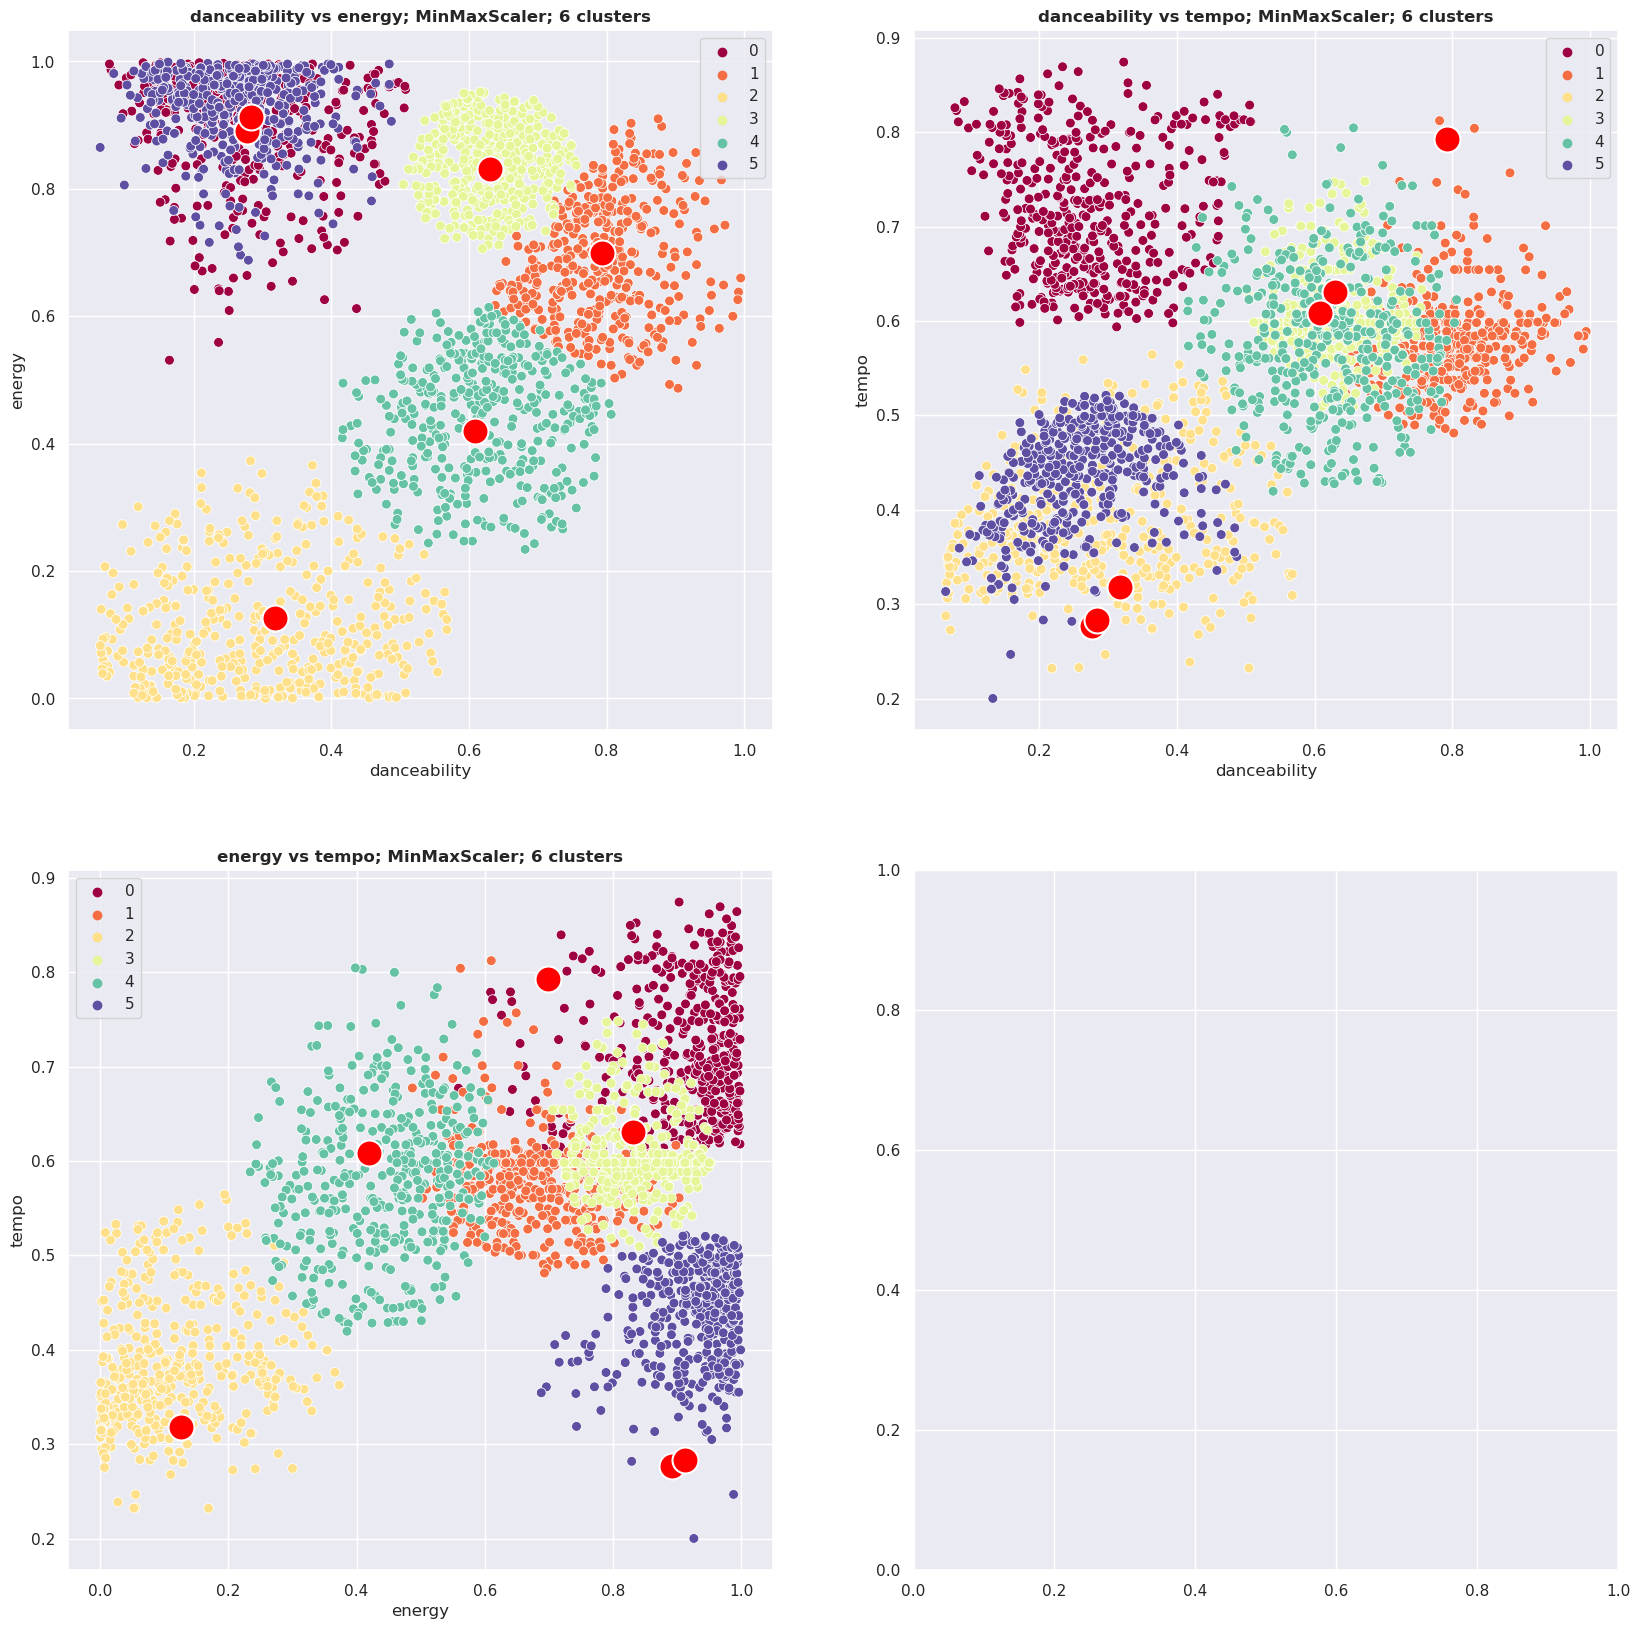

In [18]:
# scatter plots

data_plot=appended_cluster

data_centroids = cl_pos

## picking the column, which has 'cluster' in the name
cluster = [col for col in data_plot if col.startswith('cluster')][0]
## -------------------------------------------------------------------------------------------------
## -------------------------------------------------------------------------------------------------

## PLOT
fig, ax = plt.subplots(2,2, figsize=(20, 20))

## GRAPHS
sns.scatterplot(data=data_plot, x=f'{feature_1}', y=f'{feature_2}', s=50, hue= cluster, palette='Spectral', ax=ax[0, 0])
sns.scatterplot(data=data_plot, x=f'{feature_1}', y=f'{feature_3}', s=50, hue= cluster, palette='Spectral', ax=ax[0, 1])
sns.scatterplot(data=data_plot, x=f'{feature_2}', y=f'{feature_3}', s=50, hue= cluster, palette='Spectral', ax=ax[1, 0])

## CENTROIDS
sns.scatterplot(data=data_centroids, x=f'cl_{feature_1}', y=f'cl_{feature_2}', color='red', s=350, ax=ax[0, 0])
sns.scatterplot(data=data_centroids, x=f'cl_{feature_1}', y=f'cl_{feature_3}', color='red', s=350, ax=ax[0, 1])
sns.scatterplot(data=data_centroids, x=f'cl_{feature_2}', y=f'cl_{feature_3}', color='red', s=350, ax=ax[1, 0])

## LABEL
ax[0, 0].set_title(f'{feature_1} vs {feature_2}; {name_scaler}; {str(cluster_no)} clusters', fontweight="bold")
ax[0, 1].set_title(f'{feature_1} vs {feature_3}; {name_scaler}; {str(cluster_no)} clusters', fontweight="bold")
ax[1, 0].set_title(f'{feature_2} vs {feature_3}; {name_scaler}; {str(cluster_no)} clusters', fontweight="bold")

plt.show()

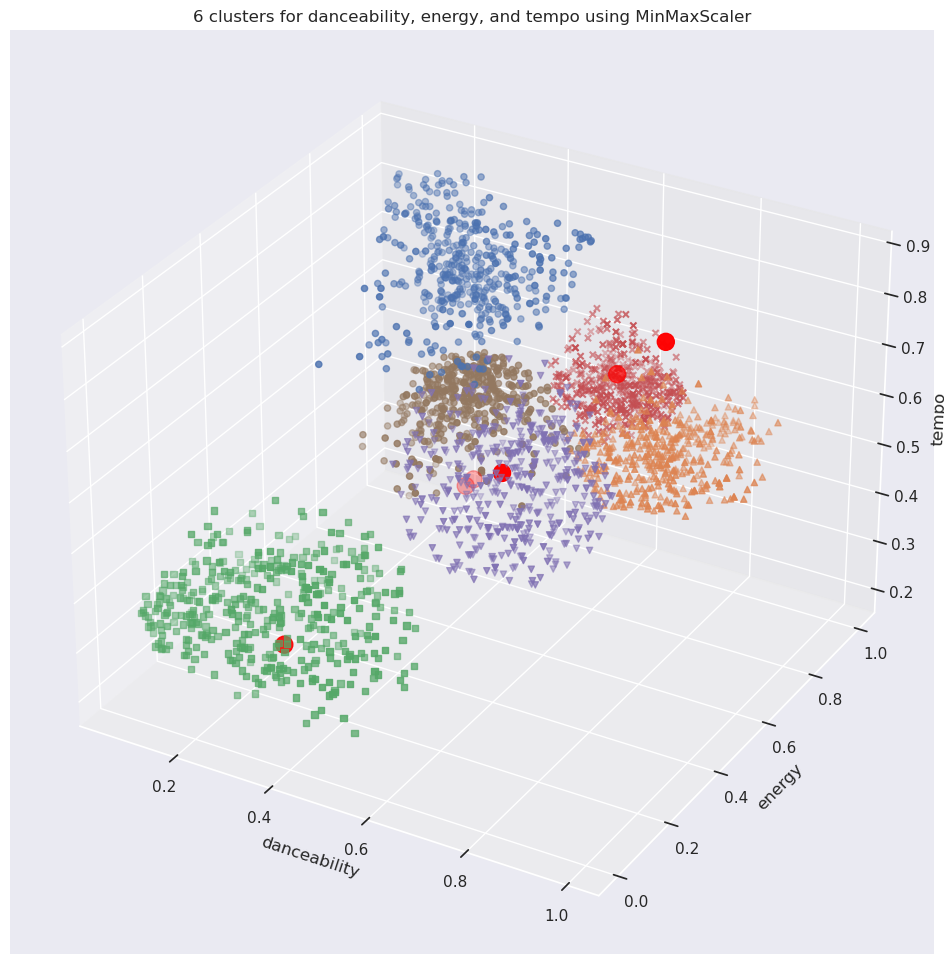

In [19]:
# 3D plot
#appended_cluster_plot = appended_cluster[['danceability','energy','tempo','cluster']]
appended_cluster_plot = appended_cluster[[str(column_list[0]),str(column_list[1]),str(column_list[2]),'cluster']]

plot_data = appended_cluster

colors = ['r','g','b']
markers = ['o', '^','s','x','v','o']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# ax.scatter(plot_data['bill_depth_mm'], plot_data['bill_length_mm'], plot_data['flipper_length_mm'])
for marker, d in plot_data.groupby('cluster'):
    ax.scatter(d[f'{feature_1}'], d[f'{feature_2}'], d[f'{feature_3}'], marker=markers[marker], label=d['cluster'])
ax.scatter(cl_pos[f'cl_{feature_1}'], cl_pos[f'cl_{feature_2}'],cl_pos[f'cl_{feature_3}'], color='red', s=150)
ax.set_title(f'{cluster_no} clusters for {feature_1}, {feature_2}, and {feature_3} using {name_scaler}')
ax.set_xlabel(f'{feature_1}')
ax.set_ylabel(f'{feature_2}')
ax.set_zlabel(f'{feature_3}')
plt.show()

In [20]:
appended_cluster

,danceability,energy,tempo,cluster,cl_danceability,cl_energy,cl_tempo,eucl_dist
4335,0.295760,0.830,0.607402,0,0.277112,0.891442,0.277112,0.336473
3427,0.251293,0.926,0.613674,0,0.277112,0.891442,0.277112,0.339315
512,0.321613,0.867,0.613253,0,0.277112,0.891442,0.277112,0.339953
4007,0.288521,0.936,0.616781,0,0.277112,0.891442,0.277112,0.342769
4326,0.322647,0.851,0.616959,0,0.277112,0.891442,0.277112,0.345260
...,...,...,...,...,...,...,...,...
4241,0.280248,0.960,0.518393,5,0.283294,0.912329,0.283294,0.239903
3982,0.300931,0.994,0.508304,5,0.283294,0.912329,0.283294,0.240022
3435,0.112720,0.985,0.436226,5,0.283294,0.912329,0.283294,0.240343
3885,0.298862,0.972,0.515608,5,0.283294,0.912329,0.283294,0.240360


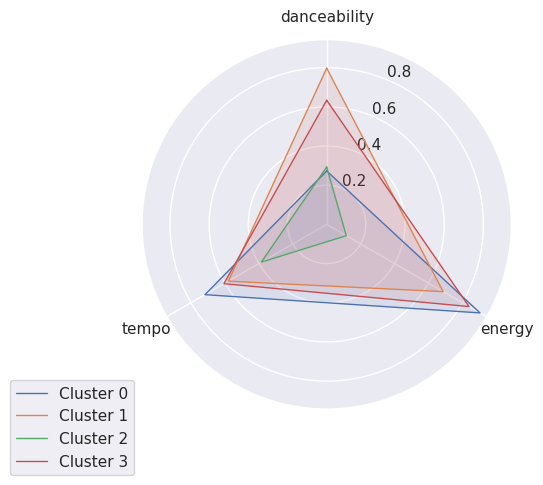

In [21]:
cluster = [col for col in appended_cluster if col.startswith('cluster')][0]
clustered_centroids = appended_cluster.groupby(cluster).mean()

#Radar plot
radar_df = clustered_centroids.reset_index().rename(columns={'index': cluster}).drop([f'cl_{feature_1}',f'cl_{feature_2}',f'cl_{feature_3}','eucl_dist'], axis=1)
# ------- PART 1: Create background



# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop(cluster).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop(cluster).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop(cluster).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)


values=radar_df.loc[3].drop(cluster).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'r', alpha=0.1)


# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.0, 0.1))


# Show the graph
plt.show()


# 4. Creating a playlists from clusters (unfinished business)

In [22]:
clusters_final_df = pd.merge(songs_full_df,appended_cluster, left_index=True, right_index=True)

track_id_list = []
track_id_list.append(clusters_final_df['id'])
#track_id_list

In [23]:
# Requires authentication

#cid = spotify_keys.cid
#csecret = spotify_keys.csecret
#sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
#client_id=f"{cid}",
#client_secret=f"{csecret}"))

#cluster_n_pl = sp.user_playlist_create(cid, 'cluster_n', public=True, collaborative=False, description='Cluster 1')
#sp.user_playlist_add_tracks(cid, cluster_n_pl, track_id_list, position=None)


#user - the id of the user
#            name - the name of the playlist
#            public - is the created playlist public
#            collaborative - is the created playlist collaborative
#            description - the description of the playlist